In [914]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

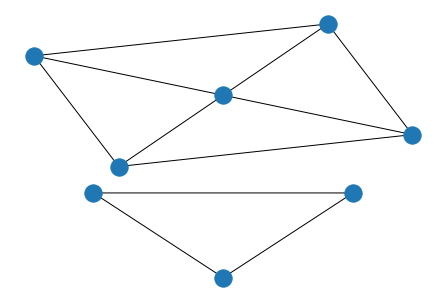

In [915]:
data_file = pd.read_csv('./Disconn.csv') 
G = nx.Graph()
for i in range(len(data_file)):
  G.add_edge(data_file['F'][i],data_file['T'][i])

nx.draw_kamada_kawai(G)

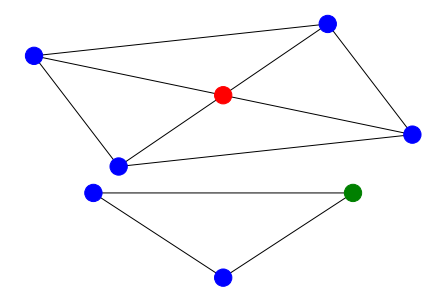

In [916]:
color_of_node=[]
all_classes = ['red', 'green']
no_of_classes = len(all_classes)

for n in list(G.nodes):
  if n==2:
    color_of_node.append('red')
  elif n==8:
    color_of_node.append('green')
  else:
    color_of_node.append('blue')

nx.draw_kamada_kawai(G, node_color=color_of_node)
plt.show()

In [917]:
all_nodes = list(G.nodes)

Prob_matrix = np.zeros((len(all_nodes),len(all_nodes)))


for i in range(len(all_nodes)):
  for j in range(len(all_nodes)):
    if i==j:
      Prob_matrix[i][j] = 1/2
    elif (all_nodes[i],all_nodes[j]) in list(G.edges) or (all_nodes[j],all_nodes[i]) in list(G.edges):
      Prob_matrix[i][j] = (1/np.power(2,G.degree[all_nodes[i]]))



In [918]:
f_c_matrix = np.zeros((len(all_nodes),no_of_classes))

for i in range(len(all_nodes)):
  rand_array = np.random.random(no_of_classes)
  for c in range(no_of_classes):
    f_c_matrix[i][c] = rand_array[c]

f_c_matrix[all_nodes.index(2)][all_classes.index('red')], f_c_matrix[all_nodes.index(2)][all_classes.index('green')] = 1, 0 
f_c_matrix[all_nodes.index(8)][all_classes.index('red')], f_c_matrix[all_nodes.index(8)][all_classes.index('green')] = 0, 1 
#f_c_matrix[all_nodes.index(19)][all_classes.index('red')], f_c_matrix[all_nodes.index(19)][all_classes.index('green')], f_c_matrix[all_nodes.index(19)][all_classes.index('yellow')] = 0, 0, 1 

In [919]:
for i in range(1):
  for c in range(no_of_classes):
    f_c_matrix[:,c] = np.dot(Prob_matrix,f_c_matrix[:,c])
#   f_c_matrix[all_nodes.index(6)][all_classes.index('red')], f_c_matrix[all_nodes.index(6)][all_classes.index('green')], f_c_matrix[all_nodes.index(6)][all_classes.index('yellow')] = 1, 0, 0 
#   f_c_matrix[all_nodes.index(10)][all_classes.index('red')], f_c_matrix[all_nodes.index(10)][all_classes.index('green')], f_c_matrix[all_nodes.index(10)][all_classes.index('yellow')] = 0, 1, 0 
#   f_c_matrix[all_nodes.index(19)][all_classes.index('red')], f_c_matrix[all_nodes.index(19)][all_classes.index('green')], f_c_matrix[all_nodes.index(19)][all_classes.index('yellow')] = 0, 0, 1 
    f_c_matrix[all_nodes.index(2)][all_classes.index('red')], f_c_matrix[all_nodes.index(2)][all_classes.index('green')] = 1, 0 
    f_c_matrix[all_nodes.index(8)][all_classes.index('red')], f_c_matrix[all_nodes.index(8)][all_classes.index('green')] = 0, 1 


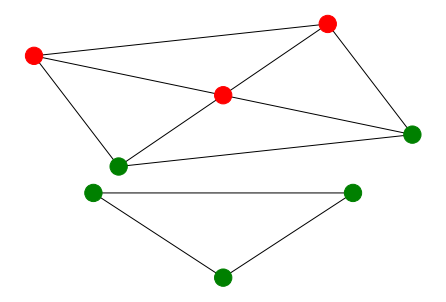

In [920]:
color_of_node=[]
for i in range(len(all_nodes)):
  color_index = np.argmax(f_c_matrix[i])
  color_of_node.append(all_classes[color_index])

nx.draw_kamada_kawai(G, node_color=color_of_node)
plt.show()